# Analyse and balance classes from dataset

In [1]:
INPUT_DIR='../../input/kaggle-sea-lion/02/'
OUTPUT_DIR='../../output/kaggle-sea-lion/03/'

SHOW_IMAGES = True
MAX_IMAGES = 1

IMAGE_DIMS = (148,148,3)

RANDOM_SEED = 1

#%prun print('test')
#%pdb

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os
import random
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

import modules.logging
from modules.logging import logger
import modules.lions as lions
from modules.utils import Timer
import modules.utils as utils

random.seed(RANDOM_SEED)

Using TensorFlow backend.


## Prepare output dir

In [3]:
utils.mkdirs(OUTPUT_DIR, recreate=True)
modules.logging.setup_file_logger(OUTPUT_DIR + 'out.log')
logger.info('Dir ' + OUTPUT_DIR + ' created')

2017-04-08 19:26:09,925 INFO Dir ../../output/kaggle-sea-lion/03/ created


## Rebalance dataset classes

In [4]:
input_h5file_path = INPUT_DIR + utils.dataset_name('lion-patches-full', IMAGE_DIMS)
output_h5file_path = OUTPUT_DIR + utils.dataset_name('lion-patches', IMAGE_DIMS)

utils.dataset_xy_balance_classes_image(input_h5file_path, output_h5file_path, max_augmentation_ratio=0, max_undersampling_ratio=0, classes_weight=1)        

2017-04-08 19:26:09,936 INFO loading input dataset ../../input/kaggle-sea-lion/02/lion-patches-full-148-148.h5
2017-04-08 19:26:09,942 INFO > [started] traversing entire dataset in order to extract population classes distribution...
2017-04-08 19:26:09,944 INFO > [done]    traversing entire dataset in order to extract population classes distribution (2.362 ms)
2017-04-08 19:26:09,946 INFO population distribution
2017-04-08 19:26:09,947 INFO 0: 3.0
2017-04-08 19:26:09,948 INFO 1: 1.0
2017-04-08 19:26:09,950 INFO 2: 9.0
2017-04-08 19:26:09,951 INFO 3: 3.0
2017-04-08 19:26:09,952 INFO 4: 4.0
2017-04-08 19:26:09,954 INFO targeting items per class: 5.0
2017-04-08 19:26:09,955 INFO augmentation/undersampling ratio per class
2017-04-08 19:26:09,957 INFO 0: 1.66666666667
2017-04-08 19:26:09,958 INFO 1: 5.0
2017-04-08 19:26:09,960 INFO 2: 0.555555555556
2017-04-08 19:26:09,961 INFO 3: 1.66666666667
2017-04-08 19:26:09,963 INFO 4: 1.25
2017-04-08 19:26:09,965 INFO creating output dataset ../../o

### Validate dataset

In [5]:
logger.info('class distribution BEFORE balancing')
with h5py.File(input_h5file_path, 'r') as input_h5:
    y = input_h5['Y'][()]
    count_classes = utils.class_distribution(y)
    logger.info(str(count_classes))

2017-04-08 19:26:10,369 INFO class distribution BEFORE balancing
2017-04-08 19:26:10,373 INFO [  7.   4.  29.   6.  24.]


In [6]:
logger.info('class distribution AFTER balancing')
with h5py.File(output_h5file_path, 'r') as output_h5:
    y = output_h5['Y'][()]
    count_classes = utils.class_distribution(y)
    logger.info(str(count_classes))

2017-04-08 19:26:10,389 INFO class distribution AFTER balancing
2017-04-08 19:26:10,392 INFO [ 8.  6.  5.  8.  9.]


2017-04-08 19:26:10,400 INFO > [started] generating image patches. rows=8; cols=10...


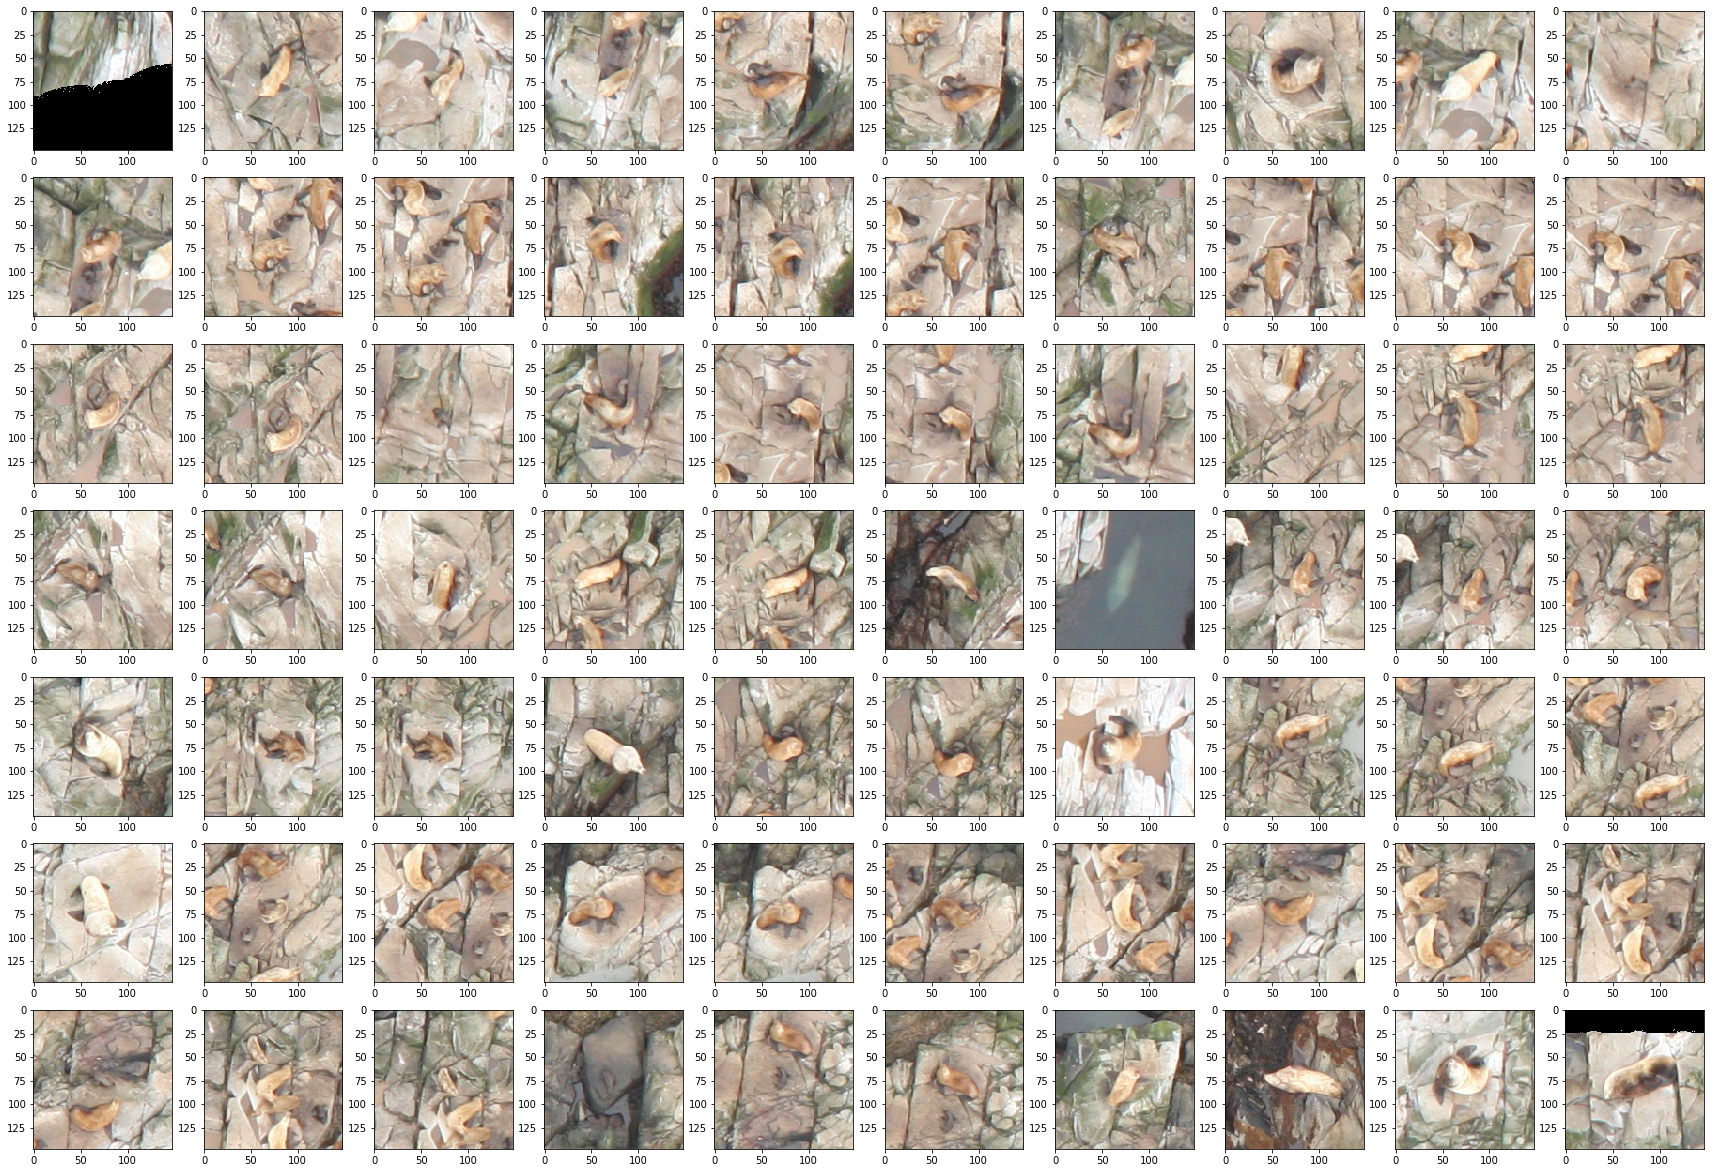

2017-04-08 19:26:20,561 INFO > [done]    generating image patches. rows=8; cols=10 (10161.342 ms)


In [7]:
with h5py.File(input_h5file_path, 'r') as input_h5:
    utils.show_images(input_h5['X'], cols=10, is_bgr=True, size=3)

2017-04-08 19:26:20,585 INFO > [started] generating image patches. rows=5; cols=10...
/notebooks/datascience-snippets/kaggle-sea-lion/modules/utils.py:251: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(image_labels!=None):


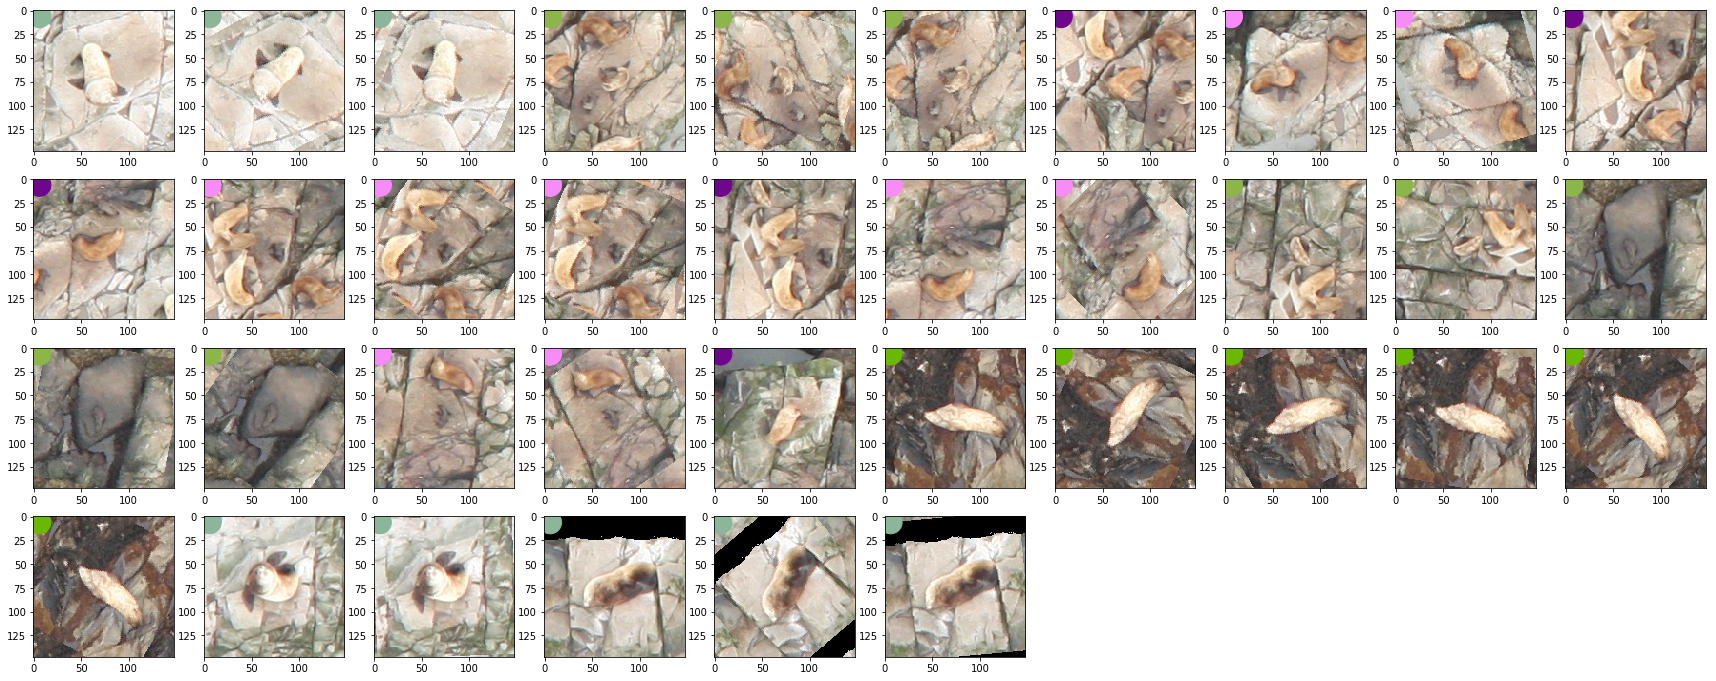

2017-04-08 19:26:26,317 INFO > [done]    generating image patches. rows=5; cols=10 (5731.860 ms)


In [8]:
with h5py.File(output_h5file_path, 'r') as output_h5:
    utils.show_images(output_h5['X'], image_labels=utils.categorical_to_label(output_h5['Y'][()]), cols=10, is_bgr=True, size=3)